
Dataset shape: (100000, 9)

Numeric features: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Categorical features: ['gender', 'smoking_history']

🎯 Accuracy: 0.8014

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9920    0.7894    0.8792     18300
           1     0.2912    0.9312    0.4436      1700

    accuracy                         0.8014     20000
   macro avg     0.6416    0.8603    0.6614     20000
weighted avg     0.9324    0.8014    0.8421     20000


🔍 Confusion Matrix:
        Pred 0  Pred 1
True 0   14446    3854
True 1     117    1583


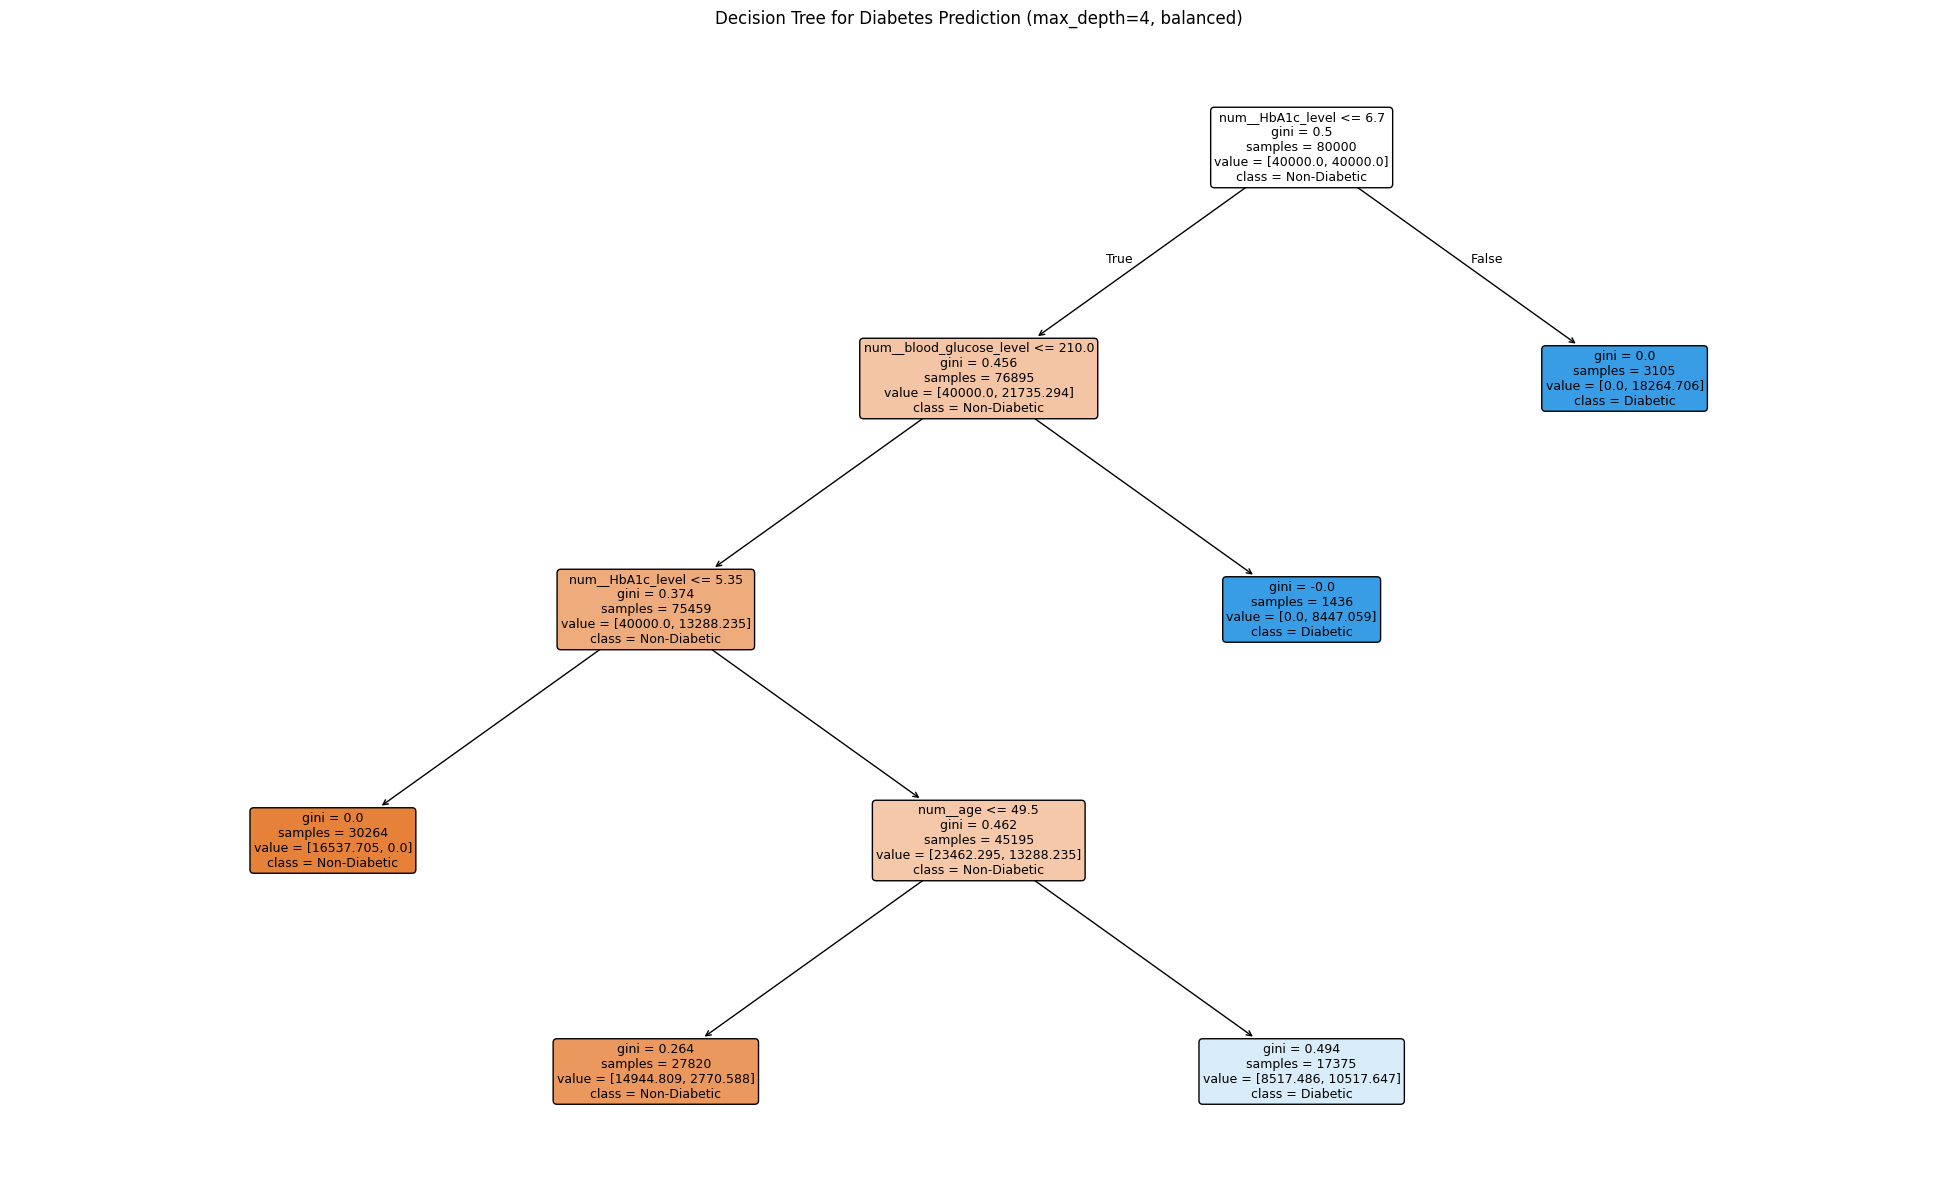

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\dataset\\diabetes_prediction_dataset.csv")

print("\nDataset shape:", df.shape)
df.head()


TARGET_COLUMN = "diabetes"
y = df[TARGET_COLUMN].astype(int)
X = df.drop(columns=[TARGET_COLUMN])


numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)


preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", SimpleImputer(strategy="median"))]), numeric_features),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_features),
    ],
    remainder="drop",
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(
        random_state=42,
        max_depth=4,
        class_weight="balanced"
    ))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc:.4f}\n")

print("📋 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["True 0", "True 1"], columns=["Pred 0", "Pred 1"])
print("\n🔍 Confusion Matrix:")
print(cm_df)


prep = clf.named_steps["prep"]
tree = clf.named_steps["model"]

try:
    feat_names = prep.get_feature_names_out()
except:
    feat_names = np.array(numeric_features + [f"{c}__onehot" for c in categorical_features])

plt.figure(figsize=(25, 15))
plot_tree(
    tree,
    feature_names=feat_names,
    class_names=["Non-Diabetic", "Diabetic"],
    filled=True,
    rounded=True,
    impurity=True,
    fontsize=9
)
plt.title("Decision Tree for Diabetes Prediction (max_depth=4, balanced)")
plt.show()
